<a href="https://colab.research.google.com/github/kav95/torch_practise/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
n_pts = 100
centers = [[-5.0, 5.0], [5.0, -5.0]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [5]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b = get_params()
  x1 = np.array([-2.0, 2.0])
  x2 = (w1*x1 + b) / -w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

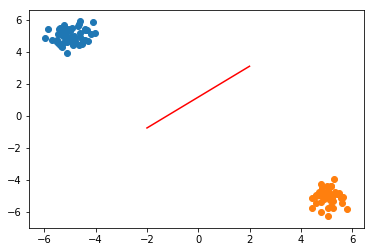

In [8]:
plot_fit("Initial model")

In [0]:
criterion = nn.BCELoss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  
  print('epoch: ', i, 'loss: ', loss)

  losses.append(loss.item())
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

Text(0.5, 0, 'epoch')

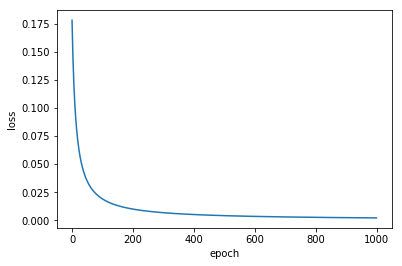

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

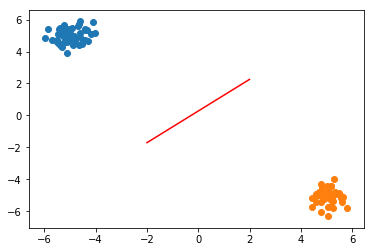

In [12]:
plot_fit('Trained model')

Red point positive probability  = 0.8062304854393005
Black point positive probability  = 0.2539178431034088


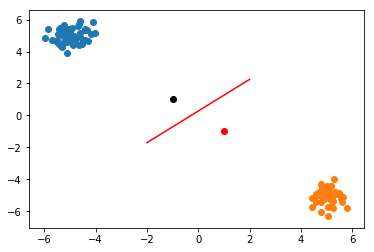

In [15]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("Red point positive probability  = {}".format(model.forward(point1).item()))
print("Black point positive probability  = {}".format(model.forward(point2).item()))
plot_fit('Trained model')